In [2]:
import numpy as np # linear algebra.
import pandas as pd # data processing.
import matplotlib.pyplot as plt # data plotting.
import seaborn as sns # to make charts and diagrams.

from tensorflow import keras # to build model 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D # useful methods for model.
from tensorflow.keras.optimizers import Adam # for optimize model.
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory data analysis.

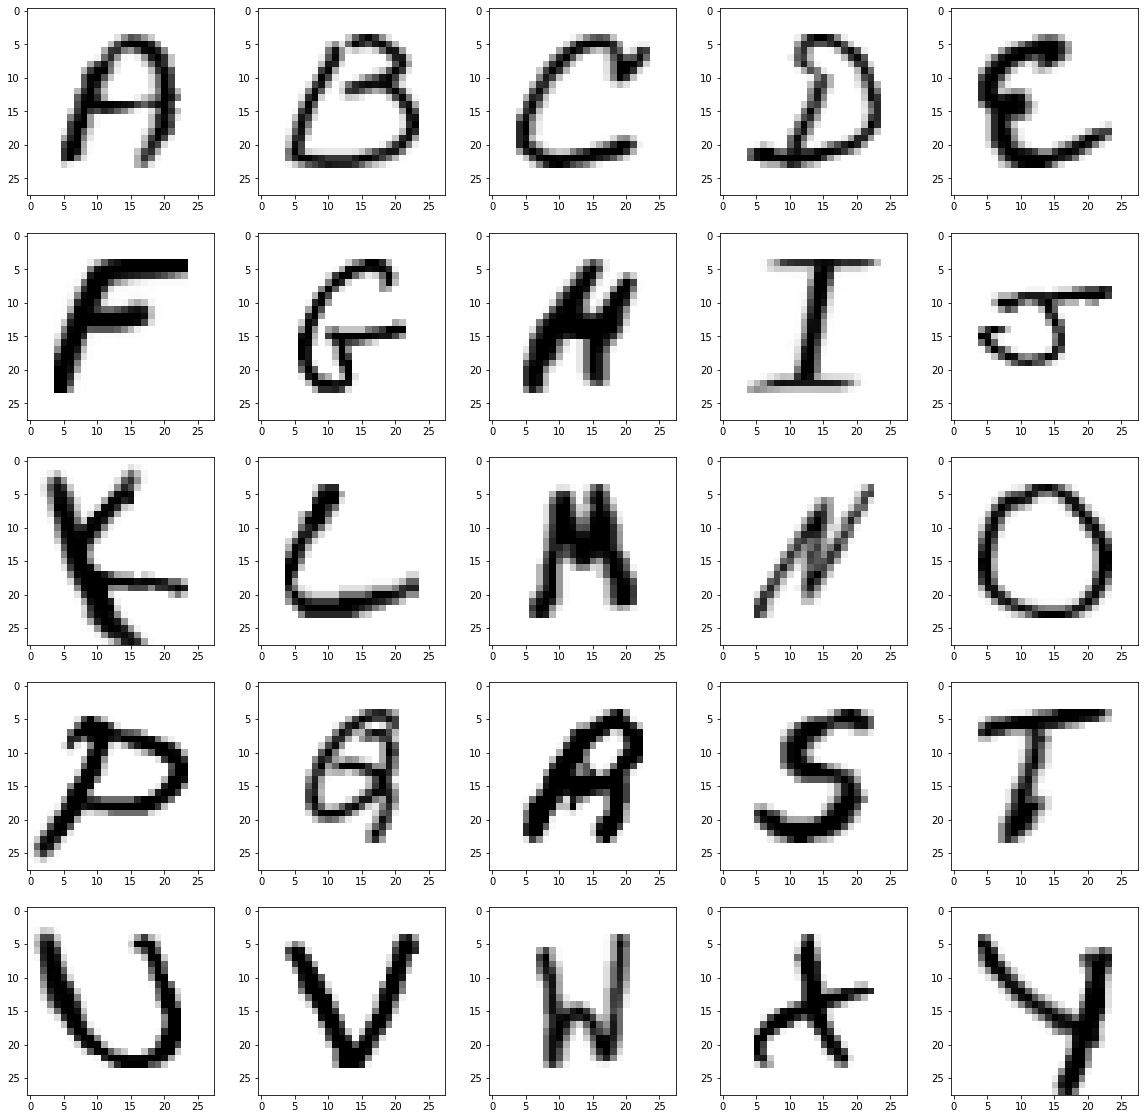

In [4]:
plt.figure(figsize=(20, 20))
for i in range(25):
    dd = data[data['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.imshow(x, cmap='binary')

In [5]:
import string
word_dict = dict()
for i, char in enumerate(string.ascii_uppercase):
    word_dict[i] = char     
    
counts = []
for i in range(26):
    counts.append(len(data[data["0"]==i]))  
    
print("word_dict: ", word_dict)    
print("counts: ", counts)

word_dict:  {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
counts:  [13869, 8668, 23409, 10134, 11440, 1163, 5762, 7218, 1120, 8493, 5603, 11586, 12336, 19010, 57825, 19341, 5812, 11566, 48419, 22495, 29008, 4182, 10784, 6272, 10859, 6076]


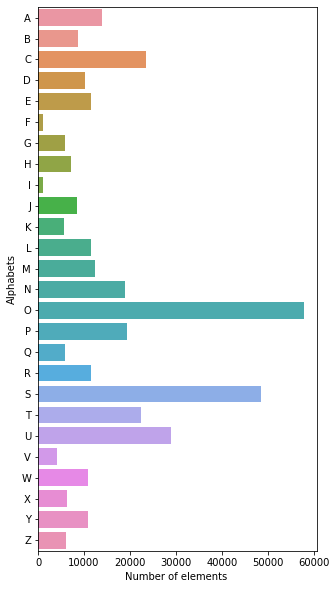

In [6]:
plt.figure(figsize=(5,10))
sns.barplot(x=counts,y=list(word_dict.values()))
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.show()

### Data prepocessing. 

In [7]:
X = data.drop("0",axis=1)
y = data["0"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train.values, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28, 28, 1))

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (297960, 28, 28, 1)
Test data shape:  (74490, 28, 28, 1)


In [9]:
y_train_ohe = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", y_train_ohe.shape)

y_test_ohe = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", y_test_ohe.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


### Build the model.
* Convolutional Neural Network.

In [10]:
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))  

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
          
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="valid"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2)) 
          
model.add(Flatten())          
          
model.add(Dense(128, activation="relu"))  
model.add(Dense(26, activation="softmax"))            

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train_ohe, epochs=3, validation_data=(X_test, y_test_ohe))

Train on 297960 samples, validate on 74490 samples
Epoch 1/3
297960/297960 [==============================] - 253s 849us/sample - loss: 0.1870 - acc: 0.9564 - val_loss: 0.0944 - val_acc: 0.9743
Epoch 2/3
297960/297960 [==============================] - 259s 870us/sample - loss: 0.0713 - acc: 0.9800 - val_loss: 0.0724 - val_acc: 0.9797
Epoch 3/3
297960/297960 [==============================] - 264s 885us/sample - loss: 0.0578 - acc: 0.9837 - val_loss: 0.0584 - val_acc: 0.9841


In [12]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [19]:
print("The validation accuracy is :", history.history['val_acc'])
print("The training accuracy is :", history.history['acc'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.97425157, 0.9797154, 0.9841052]
The training accuracy is : [0.9564304, 0.9800141, 0.9837361]
The validation loss is : [0.09441943986718687, 0.07239698242960736, 0.05838991436849895]
The training loss is : [0.18700852975925403, 0.07129732604836482, 0.05783897632177217]


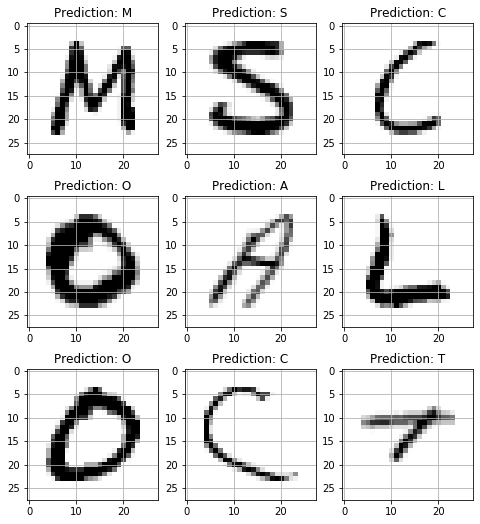

In [20]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y_test_ohe[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

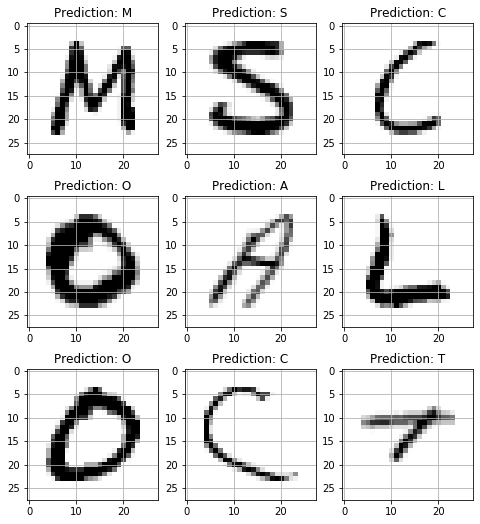

In [21]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) 
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) 
    pred = word_dict[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()